# User Firmware Version Count

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import calendar
import os
import pprint
from elasticsearch import Elasticsearch

import dtale
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#fw_count['upgrade_day'] = fw_count['upgrade_state_updated_at'].dt.day
#fw_count['upgrade_month'] = fw_count['upgrade_state_updated_at'].dt.month.fillna(0.0).astype(int)
#fw_count['upgrade_month'] = fw_count['upgrade_month'].apply(lambda x: calendar.month_abbr[x])
#fw_count['upgrade_date'] = fw_count['upgrade_month'].map(str) + "-" + fw_count['upgrade_day'].map(str)
#fw_count['upgrade_date'] = fw_count['upgrade_date'].str.slice(start=0, stop=6)
#fw_count['upgrade_date'] = fw_count['upgrade_date'].str.replace(".","")

In [3]:
path = 'C:\\Users\\bokhy\\Desktop\\ATG\\Power BI'
fw_count_y = pd.read_csv(os.path.join(path, 'V.csv'), engine='python')
fw_count_n = pd.read_csv(os.path.join(path, 'V1.csv'), engine='python')

In [4]:
fw_count_y.shape

(3766, 4)

In [5]:
fw_count_n.shape

(3745, 7)

In [6]:
fw_count_y.head()

,UUID,display_version_number,upgrade_state_updated_at,State
0,88001908A0000168,5.12.0,2020-11-28 15:31:22,Success
1,88001908A00010A8,5.12.0,2020-11-29 16:28:26,Success
2,88001908A0002330,5.12.0,2020-11-27 19:54:35,Success
3,88001908A00027E0,5.12.0,2020-11-26 15:15:39,Success
4,88001908A0004400,5.12.0,2020-11-26 18:30:49,Success


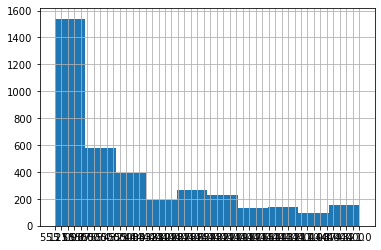

In [7]:
fw_count_y.display_version_number.hist()

In [8]:
fw_count_n_notnull = fw_count_n[fw_count_n['display_version_number'].notnull()]
fw_count_n_null = fw_count_n[fw_count_n['display_version_number'].isnull()]
fw_count_n_null['display_version_number'] = fw_count_n_null['version_number']

fw_count_n = fw_count_n_notnull.append(fw_count_n_null)
fw_count = fw_count_y.append(fw_count_n)
fw_count = fw_count.sort_values("display_version_number", ascending=False).reset_index()

c:\users\bokhy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
fw_count.shape

(7511, 8)

In [10]:
fw_count.head()

,index,UUID,display_version_number,upgrade_state_updated_at,State,version_id,version_number,current_version
0,1156,88001908A01769D0,5.9.0,2020-11-08 00:58:40,Success,NaN,NaN,NaN
1,1237,88001912B00993C8,5.9.0,2020-11-10 01:27:41,Success,NaN,NaN,NaN
2,1239,88001912B0104838,5.9.0,2020-11-05 16:53:48,Success,NaN,NaN,NaN
3,1240,88001912B0111300,5.9.0,2020-11-09 19:18:51,Success,NaN,NaN,NaN
4,1241,88001912B0112140,5.9.0,2020-11-06 16:07:39,Success,NaN,NaN,NaN


In [11]:
TIMEZONE = 'utc'
fw_count['upgrade_state_updated_at'] = pd.to_datetime(fw_count['upgrade_state_updated_at'],format="%Y-%m-%d %H:%M:%S",errors='coerce')

In [12]:
fw_count['upgrade_date']  = fw_count['upgrade_state_updated_at'].dt.date
fw_count['upgrade_date']  = pd.to_datetime(fw_count['upgrade_date'])
fw_count = fw_count.drop(['current_version','upgrade_state_updated_at','version_id'], axis=1)

In [13]:
fw_count.shape

(7511, 6)

In [14]:
fw_count.head()

,index,UUID,display_version_number,State,version_number,upgrade_date
0,1156,88001908A01769D0,5.9.0,Success,NaN,2020-11-08
1,1237,88001912B00993C8,5.9.0,Success,NaN,2020-11-10
2,1239,88001912B0104838,5.9.0,Success,NaN,2020-11-05
3,1240,88001912B0111300,5.9.0,Success,NaN,2020-11-09
4,1241,88001912B0112140,5.9.0,Success,NaN,2020-11-06


In [15]:
def fw_release(row):
    if row["display_version_number"] == "4.1.0":
        return "2020-Jan-15"    
    elif row['display_version_number'] == "4.2.0":
        return '2020-Jan-22'
    elif row['display_version_number'] == "4.3.0":
        return '2020-Jan-29'
    elif row['display_version_number'] == "4.4.0":
        return '2020-Feb-5'
    elif row['display_version_number'] == "4.5.0":
        return '2020-Feb-12'
    elif row['display_version_number'] == "4.6.0":
        return '2020-Feb-14'
    elif row['display_version_number'] == "4.7.0":
        return '2020-Feb-19'
    elif row['display_version_number'] == "4.8.0":
        return '2020-Feb-26'
    elif row['display_version_number'] == "4.9.0":
        return '2020-Mar-4'
    elif row['display_version_number'] == "4.10.0":
        return '2020-Mar-11'
    elif row['display_version_number'] == "4.11.0":
        return '2020-Mar-18'
    elif row['display_version_number'] == "4.11.1":
        return '2020-Mar-20'
    elif row['display_version_number'] == "4.12.0":
        return '2020-Mar-25'
    elif row['display_version_number'] == "4.13.0":
        return '2020-Apr-1'
    elif row['display_version_number'] == "4.14.0":
        return '2020-Apr-8'
    elif row['display_version_number'] == "4.14.1":
        return '2020-Apr-10' 
    elif row['display_version_number'] == "4.15.0":
        return '2020-Apr-15'
    elif row['display_version_number'] == "4.16.0":
        return '2020-Apr-22'    
    elif row['display_version_number'] == "4.17.0":
        return '2020-Apr-29'
    elif row['display_version_number'] == "4.18.0":
        return '2020-May-6'    
    elif row['display_version_number'] == "4.19.0":
        return '2020-May-13'      
    elif row['display_version_number'] == "4.20.0":
        return '2020-May-20'     
    elif row['display_version_number'] == "4.21.0":
        return '2020-May-27'    
    elif row['display_version_number'] == "4.22.0":
        return '2020-Jun-3'  
    elif row['display_version_number'] == "4.23.0":
        return '2020-Jun-10'     
    elif row['display_version_number'] == "4.24.0":
        return '2020-Jun-17'  
    elif row['display_version_number'] == "4.25.0":
        return '2020-Jun-24'
    elif row['display_version_number'] == "4.26.0":
        return '2020-Jul-1'     
    elif row['display_version_number'] == "4.26.1":
        return '2020-Jul-3'  
    elif row['display_version_number'] == "4.27.0":
        return '2020-Jul-8' 
    elif row['display_version_number'] == "4.28.0":
        return '2020-Jul-15'     
    elif row['display_version_number'] == "4.29.0":
        return '2020-Jul-22'     
    elif row['display_version_number'] == "4.30.0":
        return '2020-Jul-29'
    elif row['display_version_number'] == "4.31.0":
        return '2020-Aug-5'    
    elif row['display_version_number'] == "4.32.0":
        return '2020-Aug-12' 
    elif row['display_version_number'] == "4.33.0":
        return '2020-Aug-19'     
    elif row['display_version_number'] == "4.34.0":
        return '2020-Aug-26'  
    elif row['display_version_number'] == "5.0.0":
        return '2020-Sep-7'  
    elif row['display_version_number'] == "5.1.0":
        return '2020-Sep-14'      
    elif row['display_version_number'] == "5.2.0":
        return '2020-Sep-16'
    elif row['display_version_number'] == "5.3.0":
        return '2020-Sep-23'    
    elif row['display_version_number'] == "5.4.0":
        return '2020-Sep-30' 
    elif row['display_version_number'] == "5.5.0":
        return '2020-Oct-7' 
    elif row['display_version_number'] == "5.6.0":
        return '2020-Oct-14' 
    elif row['display_version_number'] == "5.7.0":
        return '2020-Oct-21' 
    elif row['display_version_number'] == "5.8.0":
        return '2020-Oct-28' 
    elif row['display_version_number'] == "5.9.0":
        return '2020-Nov-4' 
    elif row['display_version_number'] == "5.10.0":
        return '2020-Nov-11' 
    elif row['display_version_number'] == "5.11.0":
        return '2020-Nov-18' 
    elif row['display_version_number'] == "5.12.0":
        return '2020-Nov-25' 
    
    else:
        return 'N/A'

In [16]:
def increment_number(row):
    if row["display_version_number"] == "4.1.0":
        return 1    
    elif row['display_version_number'] == "4.2.0":
        return 2
    elif row['display_version_number'] == "4.3.0":
        return 3
    elif row['display_version_number'] == "4.4.0":
        return 4
    elif row['display_version_number'] == "4.5.0":
        return 5
    elif row['display_version_number'] == "4.6.0":
        return 6
    elif row['display_version_number'] == "4.7.0":
        return 7
    elif row['display_version_number'] == "4.8.0":
        return 8
    elif row['display_version_number'] == "4.9.0":
        return 9
    elif row['display_version_number'] == "4.10.0":
        return 10
    elif row['display_version_number'] == "4.11.0":
        return 11
    elif row['display_version_number'] == "4.11.1":
        return 12
    elif row['display_version_number'] == "4.12.0":
        return 13
    elif row['display_version_number'] == "4.13.0":
        return 14
    elif row['display_version_number'] == "4.14.0":
        return 15
    elif row['display_version_number'] == "4.14.1":
        return 16 
    elif row['display_version_number'] == "4.15.0":
        return 17
    elif row['display_version_number'] == "4.16.0":
        return 18    
    elif row['display_version_number'] == "4.17.0":
        return 19
    elif row['display_version_number'] == "4.18.0":
        return 20    
    elif row['display_version_number'] == "4.19.0":
        return 21      
    elif row['display_version_number'] == "4.20.0":
        return 22     
    elif row['display_version_number'] == "4.21.0":
        return 23    
    elif row['display_version_number'] == "4.22.0":
        return 24  
    elif row['display_version_number'] == "4.23.0":
        return 25     
    elif row['display_version_number'] == "4.24.0":
        return 26  
    elif row['display_version_number'] == "4.25.0":
        return 27
    elif row['display_version_number'] == "4.26.0":
        return 28     
    elif row['display_version_number'] == "4.26.1":
        return 29  
    elif row['display_version_number'] == "4.27.0":
        return 30 
    elif row['display_version_number'] == "4.28.0":
        return 31     
    elif row['display_version_number'] == "4.29.0":
        return 32     
    elif row['display_version_number'] == "4.30.0":
        return 33
    elif row['display_version_number'] == "4.31.0":
        return 34    
    elif row['display_version_number'] == "4.32.0":
        return 35 
    elif row['display_version_number'] == "4.33.0":
        return 36     
    elif row['display_version_number'] == "4.34.0":
        return 37  
    elif row['display_version_number'] == "5.0.0":
        return 38  
    elif row['display_version_number'] == "5.1.0":
        return 39      
    elif row['display_version_number'] == "5.2.0":
        return 40
    elif row['display_version_number'] == "5.3.0":
        return 41
    elif row['display_version_number'] == "5.4.0":
        return 42
    elif row['display_version_number'] == "5.5.0":
        return 43
    elif row['display_version_number'] == "5.6.0":
        return 44
    elif row['display_version_number'] == "5.7.0":
        return 45
    elif row['display_version_number'] == "5.8.0":
        return 46
    elif row['display_version_number'] == "5.9.0":
        return 47
    elif row['display_version_number'] == "5.10.0":
        return 48
    elif row['display_version_number'] == "5.11.0":
        return 49
    elif row['display_version_number'] == "5.12.0":
        return 50
    
    else:
        return 0

In [17]:
fw_count = fw_count.assign(increment_number = fw_count.apply(increment_number, axis=1))

In [18]:
fw_count = fw_count.assign(fw_release = fw_count.apply(fw_release, axis=1))
fw_count['fw_release'] = pd.to_datetime(fw_count['fw_release'], format='%Y-%b-%d',errors='coerce')

In [19]:
fw_count.shape

(7511, 8)

In [20]:
fw_count.head()

,index,UUID,display_version_number,State,version_number,upgrade_date,increment_number,fw_release
0,1156,88001908A01769D0,5.9.0,Success,NaN,2020-11-08,47,2020-11-04
1,1237,88001912B00993C8,5.9.0,Success,NaN,2020-11-10,47,2020-11-04
2,1239,88001912B0104838,5.9.0,Success,NaN,2020-11-05,47,2020-11-04
3,1240,88001912B0111300,5.9.0,Success,NaN,2020-11-09,47,2020-11-04
4,1241,88001912B0112140,5.9.0,Success,NaN,2020-11-06,47,2020-11-04


In [21]:
fw_count['date_taken'] = fw_count['upgrade_date'] - fw_count['fw_release']

In [22]:
fw_count.head()

,index,UUID,display_version_number,State,version_number,upgrade_date,increment_number,fw_release,date_taken
0,1156,88001908A01769D0,5.9.0,Success,NaN,2020-11-08,47,2020-11-04,4 days
1,1237,88001912B00993C8,5.9.0,Success,NaN,2020-11-10,47,2020-11-04,6 days
2,1239,88001912B0104838,5.9.0,Success,NaN,2020-11-05,47,2020-11-04,1 days
3,1240,88001912B0111300,5.9.0,Success,NaN,2020-11-09,47,2020-11-04,5 days
4,1241,88001912B0112140,5.9.0,Success,NaN,2020-11-06,47,2020-11-04,2 days


In [23]:
fw_count.describe

<bound method NDFrame.describe of       index              UUID display_version_number    State version_number  \
0      1156  88001908A01769D0                  5.9.0  Success            NaN   
1      1237  88001912B00993C8                  5.9.0  Success            NaN   
2      1239  88001912B0104838                  5.9.0  Success            NaN   
3      1240  88001912B0111300                  5.9.0  Success            NaN   
4      1241  88001912B0112140                  5.9.0  Success            NaN   
...     ...               ...                    ...      ...            ...   
7506   3761  88001908A0228238                    NaN  Success            NaN   
7507   3762  88001908A03708B0                    NaN  Success            NaN   
7508   3763  88001908A0430348                    NaN  Success            NaN   
7509   3764  88001908A05429F8                    NaN  Success            NaN   
7510   3765  88001908A0571258                    NaN  Success            NaN   

     

In [24]:
fw_count.shape

(7511, 9)

### Firmware User in 5.x release

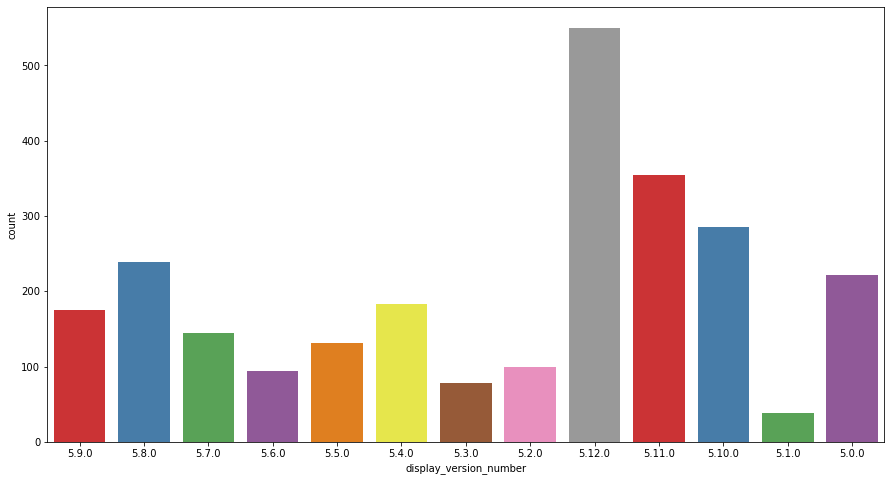

In [25]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(data=fw_count[fw_count['increment_number'] >= 38],
              x="display_version_number",
              palette='Set1')

In [26]:
fw_count['State'].value_counts()

Success       3766
CHECKING      3589
DOWNLOADED     156
Name: State, dtype: int64

In [27]:
fw_count.to_csv(os.path.join(path, 'fw_count.csv'), index=False)